<a href="https://colab.research.google.com/github/ChiNonsoHenry16/A-Comparative-Study-of-Convolutional-Neural-Networks-for-Yam-Disease-Classification/blob/main/Simulating_Mechanical_Damage_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MECHANICAL DAMAGES - MD is not actually a disease—it's a category meant to tell the farmer, that "this isn’t a real disease, but mechanical injury". Its just another factor that comes into play when trying to classify leaf diseases. Its just a way to tell the farmer that this issue is not actually a disease but a damage caused by factors in a farm.


From applying of VGG 16 and other CNN architectures, it showed that MD requires strong augumentation to improve accuracies. Notice that MD is 0.00 for precision, recall, f1-score and its AUC is lower (0.67) than other classess.


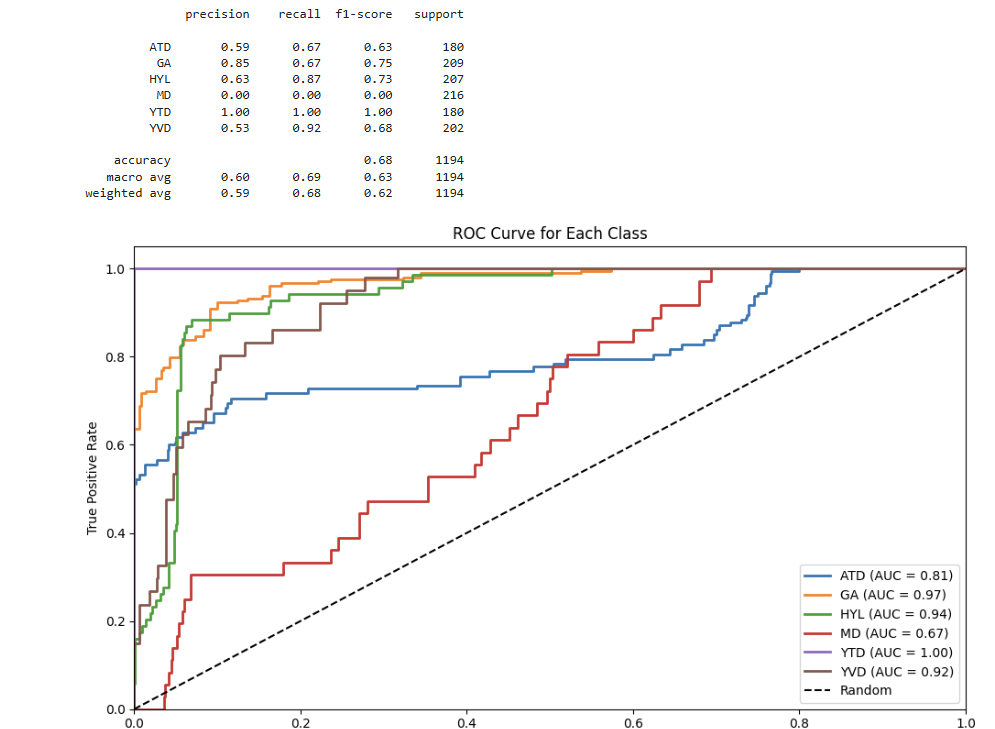

In [2]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  Import Libraries
import cv2
import numpy as np
import os
from glob import glob
import random
from tqdm.notebook import tqdm

# Damage Functions

def add_random_line(img):
    h, w = img.shape[:2]
    pt1 = (random.randint(0, w - 1), random.randint(0, h - 1))
    pt2 = (random.randint(0, w - 1), random.randint(0, h - 1))
    color = (0, 0, 0)
    thickness = random.randint(2, 6)
    cv2.line(img, pt1, pt2, color, thickness)
    return img

def add_random_zigzag(img):
    h, w = img.shape[:2]
    pts = []
    x, y = random.randint(0, w // 2), random.randint(0, h // 2)
    for _ in range(random.randint(5, 10)):
        x += random.randint(-20, 20)
        y += random.randint(-20, 20)
        x = np.clip(x, 0, w - 1)
        y = np.clip(y, 0, h - 1)
        pts.append([x, y])
    pts = np.array(pts, np.int32).reshape((-1, 1, 2))
    cv2.polylines(img, [pts], False, (0, 0, 0), thickness=random.randint(2, 4))
    return img

def add_color_shift(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    shift = random.randint(-10, 10)

    # Convert to int to allow negative shift safely
    h = hsv[..., 0].astype(int) + shift
    h = np.mod(h, 180).astype('uint8')

    s = hsv[..., 1].astype(int) + random.randint(-20, 20)
    s = np.clip(s, 0, 255).astype('uint8')

    hsv[..., 0] = h
    hsv[..., 1] = s

    img_shifted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img_shifted

def add_noise(img):
    noise = np.random.randint(0, 50, img.shape, dtype='uint8')
    img_noisy = cv2.add(img, noise)
    return img_noisy

def random_damage(img):
    if random.random() < 0.7:
        img = add_random_line(img)
    if random.random() < 0.7:
        img = add_random_zigzag(img)
    if random.random() < 0.5:
        img = add_random_polygon(img)
    if random.random() < 0.5:
        img = add_color_shift(img)
    if random.random() < 0.3:
        img = add_noise(img)
    return img

# Paths & Parameters
input_folder = "/content/drive/MyDrive/Mbajidatasetnew/train/HYL"
output_folder = "/content/drive/MyDrive/simulated_MD"

os.makedirs(output_folder, exist_ok=True)

# How many augmented versions per image?
num_aug_per_image = 3

# Process Images with Progress Bar

image_files = glob(os.path.join(input_folder, "*.jpg"))
print(f"Found {len(image_files)} healthy leaf images.")

for fn in tqdm(image_files, desc="Generating Synthetic MD"):
    img = cv2.imread(fn)
    if img is None:
        continue
    base = os.path.splitext(os.path.basename(fn))[0]
    for i in range(num_aug_per_image):
        img_aug = random_damage(img.copy())
        out_fn = os.path.join(output_folder, f"{base}_md{i}.jpg")
        cv2.imwrite(out_fn, img_aug)

print(f"Done! Synthetic MD images saved to:\n{output_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 667 healthy leaf images.


Generating Synthetic MD:   0%|          | 0/667 [00:00<?, ?it/s]

✅ Done! Synthetic MD images saved to:
/content/drive/MyDrive/simulated_MD


# Visualizing the newly created images

Found 2001 simulated MD images.


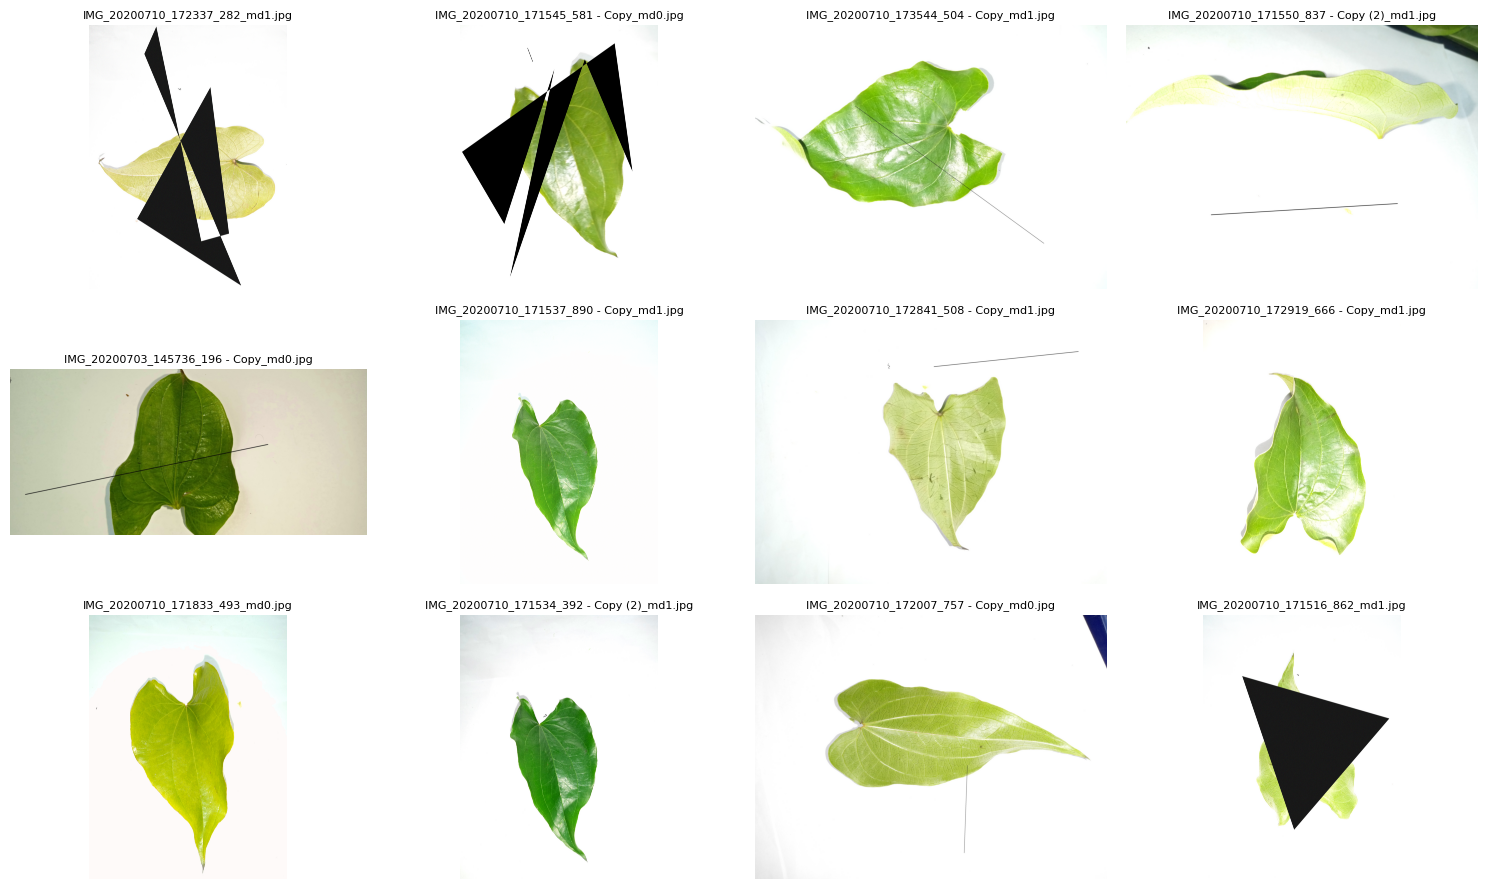

In [3]:
import matplotlib.pyplot as plt
# Specify your new folder
simulated_folder = "/content/drive/MyDrive/simulated_MD"

# How many images to display?
num_images_to_show = 12

# Get image file paths
simulated_files = glob(os.path.join(simulated_folder, "*.jpg"))

print(f"Found {len(simulated_files)} simulated MD images.")

# Pick random samples
sample_files = random.sample(simulated_files, min(num_images_to_show, len(simulated_files)))

# Plot them in a grid
cols = 4
rows = (len(sample_files) + cols - 1) // cols
plt.figure(figsize=(15, rows * 3))

for idx, img_path in enumerate(sample_files):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
